In [1]:
# using packages
using HDF5

In [2]:
# Data file with TSSOS results

file_name = "opts2022-05-29_00-10-10.hdf5"

"opts2022-05-29_00-10-10.hdf5"

In [3]:
function get_noise_levels(file_name)
    h5open(file_name, "r") do file
        return keys(file)
    end
end

get_noise_levels (generic function with 1 method)

In [4]:
println("Noise levels")
println(hcat(get_noise_levels(file_name)))
typeof(["0" "1" "2" "3" "4"])

Noise levels
["0.0"; "0.01"; "0.02"; "0.04"; "0.05";;]


Matrix{String} (alias for Array{String, 2})

In [5]:
function get_seeds(file_name, w)
    h5open(file_name, "r") do file
        return keys(file[string(w)])
    end
end    

get_seeds (generic function with 1 method)

In [6]:
w = "0.0"
seeds = get_seeds(file_name, w)
length(seeds)

21600

In [7]:
function get_best_opts(file_name, w)
    h5open(file_name, "r") do file
       return [read(file[string(w)][string(seed)]["best_opt"]) for seed in keys(file[string(w)])]     
    end
end

function get_iters(file_name, w)
    h5open(file_name, "r") do file
       return [read(file[string(w)][string(seed)]["iter"]) for seed in keys(file[string(w)])]     
    end
end

get_iters (generic function with 1 method)


(process:5476): GLib-GIO-WARNING **: 21:45:19.315: Unexpectedly, UWP app `Microsoft.MSPaint_6.2203.1037.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.MSPaint_8wekyb3d8bbwe!Microsoft.MSPaint') supports 17 extensions but has no verbs


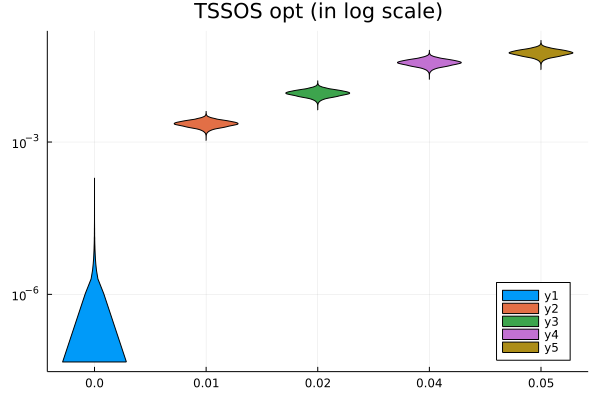

In [8]:
noise_levels = get_noise_levels(file_name)

opts = [ get_best_opts(file_name, w) for w in noise_levels]

using StatsPlots

violin(["0.0" "0.01" "0.02" "0.04" "0.05"], opts, yaxis=:log, title = "TSSOS opt (in log scale)",legend=:bottomright)

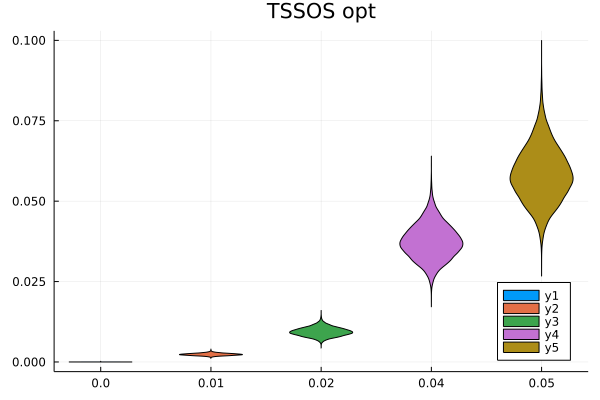

In [9]:
noise_levels = get_noise_levels(file_name)

opts = [ get_best_opts(file_name, w) for w in noise_levels]

using StatsPlots

violin(["0.0" "0.01" "0.02" "0.04" "0.05"], opts, title = "TSSOS opt", legend=:bottomright)

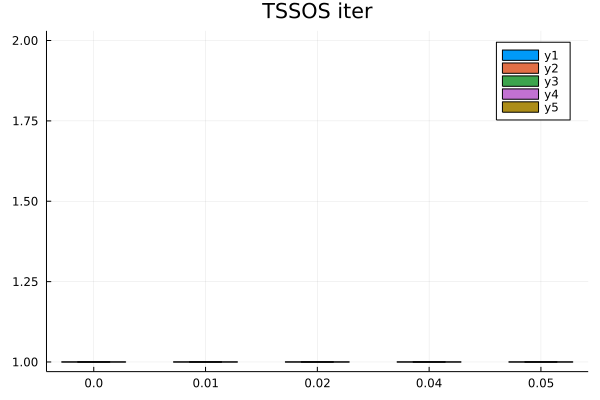

In [10]:
noise_levels = get_noise_levels(file_name)

iters = [ get_iters(file_name, w) for w in noise_levels]

using StatsPlots

boxplot(["0.0" "0.01" "0.02" "0.04" "0.05"], iters, title = "TSSOS iter")

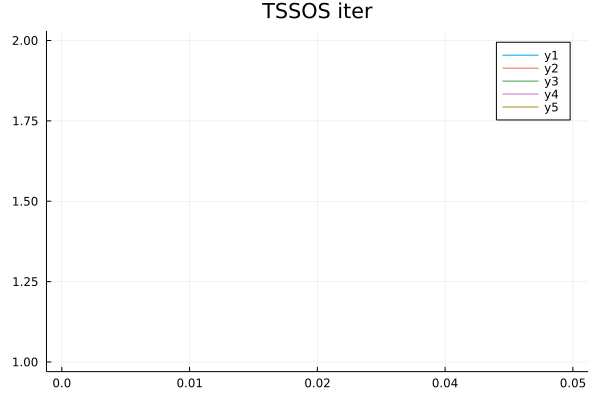

In [11]:
plot(["0.0" "0.01" "0.02" "0.04" "0.05"], iters, kind="bar", title = "TSSOS iter")

In [12]:
file_name = "lindblad_pop_sid_fidelity_vs_noise_2021-11-10 13_55_21.743372.hdf5"
h5open(file_name, "r") do file
        return keys(file["0.0"])
end

2-element Vector{String}:
 "min_fidelities"
 "seed"

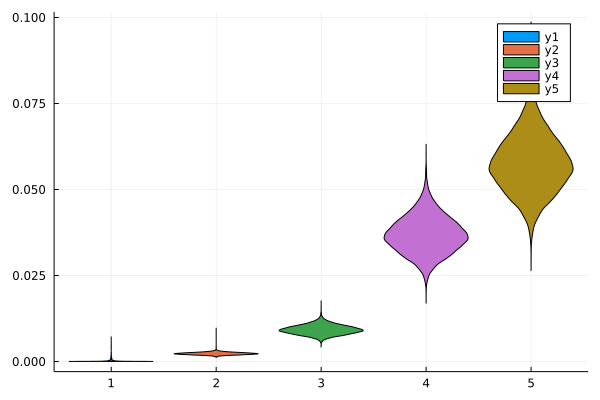

In [13]:
file_name = "lindblad_pop_sid_vs_noise_3methods_combined.hdf5"

function read_obj_val_o3(file_name, w)
    h5open(file_name, "r") do file
    return read(file[w]["obj_val_o3"])
    end
end

objs = [ read_obj_val_o3(file_name, w) for w in noise_levels]
        
violin(objs)

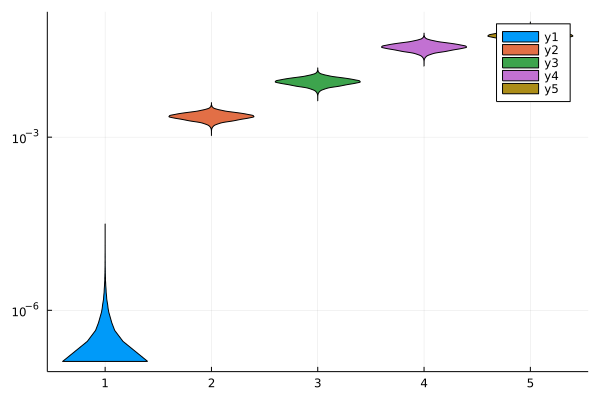

In [14]:
using HDF5
using StatsPlots

file_name = "lindblad_pop_sid_vs_noise_3methods_combined.hdf5"

function get_noise_levels(file_name)
    h5open(file_name, "r") do file
        return keys(file)
    end
end

noise_levels = get_noise_levels(file_name)

function read_obj_o3_subs_exact(file_name, w)
    h5open(file_name, "r") do file
    return read(file[w]["obj_o3_subs_exact"])
    end
end

objs = [ read_obj_o3_subs_exact(file_name, w) for w in noise_levels]
        
violin(objs, yaxis=:log)